<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Dataset- Heart Disease Dataset</b></center> 
<center><b><h1>Ronit Savaliya | 23010101247</b></center>    
<pre>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/Heart.csv', encoding='ISO-8859-1')

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
print("Shape:", df.shape)

Shape: (1025, 14)


target
1    526
0    499
Name: count, dtype: int64


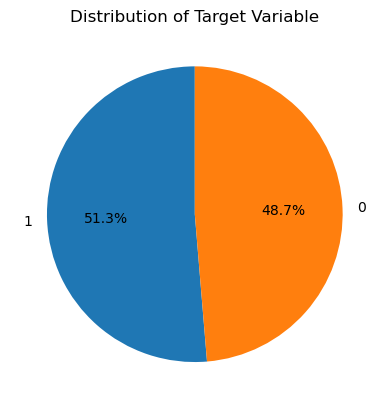

In [13]:
# Analyze Target Variable

# Count of each class
print(df['target'].value_counts())

# Pie chart of target
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Target Variable")
plt.ylabel('')
plt.show()

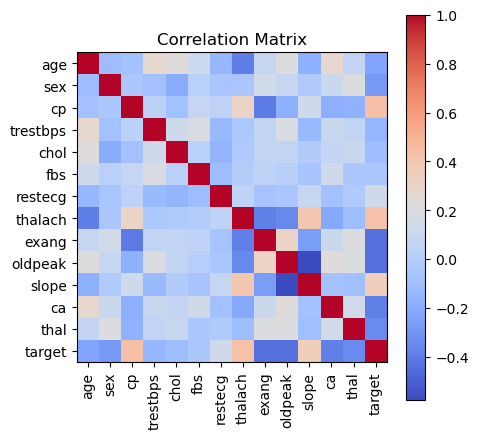

In [17]:
# Correlation Matrix

# Correlation matrix
corr_matrix = df.corr()

# Visualize using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

In [21]:
# Mean values by target
print(df.groupby('target').mean())

              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772  


sex
1    713
0    312
Name: count, dtype: int64


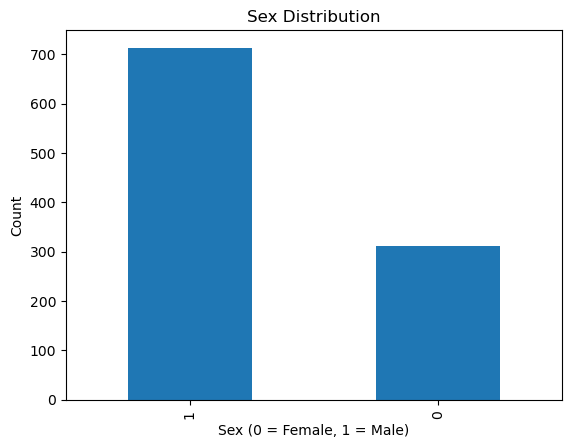

In [23]:
print(df['sex'].value_counts())
df['sex'].value_counts().plot(kind='bar', title='Sex Distribution')
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


In [25]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 723


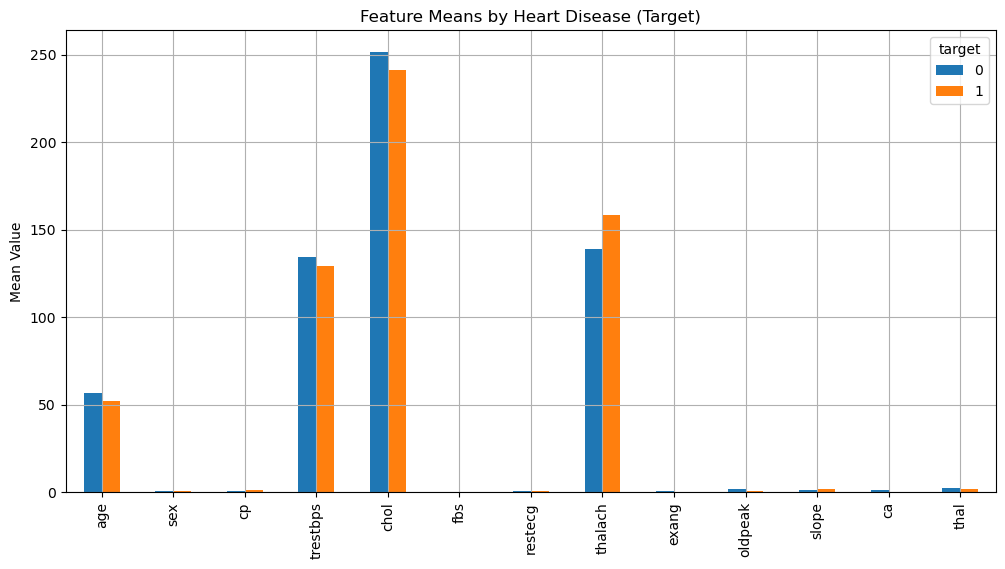

In [27]:
df.groupby('target').mean().T.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Means by Heart Disease (Target)")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

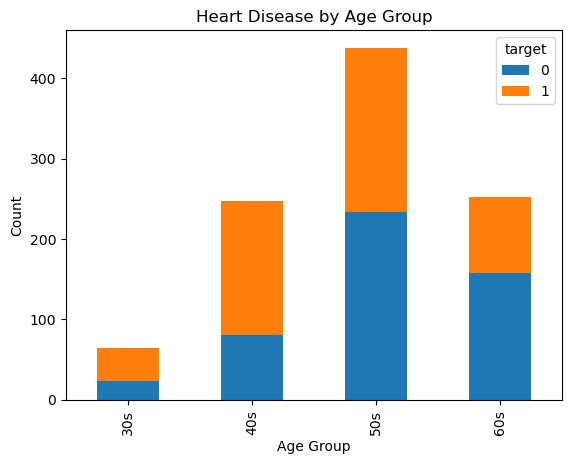

In [29]:
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70], labels=['30s', '40s', '50s', '60s'])

age_target = pd.crosstab(df['age_group'], df['target'])
age_target.plot(kind='bar', stacked=True)
plt.title("Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

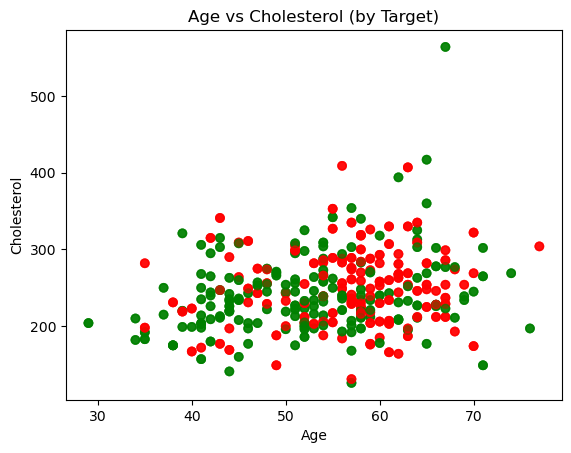

In [31]:
# Scatter plot Age vs Cholesterol, colored by target
colors = df['target'].map({0: 'red', 1: 'green'})

plt.scatter(df['age'], df['chol'], c=colors, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol (by Target)')
plt.show()

In [42]:
# tar_mean=df.groupby('target').mean()
# tar_mean

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Then group by target and calculate mean
tar_mean = numeric_df.groupby(df['target']).mean()
print(tar_mean)


              age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca  \
target                                                                 
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317   
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722   

            thal  target  
target                    
0       2.539078     0.0  
1       2.119772     1.0  
